In [37]:
import pandas as pd
import xgboost as xgb
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix  # Use this for classification tasks
from sklearn.tree import DecisionTreeClassifier
from pygam import LogisticGAM
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv(r'C:\Users\ibenn\Desktop\DSB\Year 2 HEC\Interpretable-jimams\data\data_clean.csv',sep=',')

In [26]:
data = raw_data[raw_data['birth date'] < 2020]
data['age'] = data['parole board interview date'] - data['birth date']
data['jail duration'] = data['parole board interview date'] - data['year of entry']

others_parole_type =  ['PIE', 'SP CONSDR', 'ECPDO', 'MEDICAL','RESCISSION', 'DEPORT']

data['parole board interview type'] = data['parole board interview type'].replace(others_parole_type, 'OTHERS').replace('SUPP MERIT', 'MERIT TIME').replace('PV REAPP', 'REAPPEAR')

#One hot encoding for categorical variables "Crime 1 - class", "Crime 2 - class", "Crime 3 - class", "Crime 4 - class", "Sex", "race / ethnicity", "parole board interview type"

data = data.dropna(axis=0, subset=['crime 1 - class', 'parole eligibility date'])

# assuming df is a pandas DataFrame with your data
df_one_hot = pd.get_dummies(data, columns=[
    "sex", "race / ethnicity"], drop_first=True)

df_one_hot = pd.get_dummies(df_one_hot, columns=[
    "crime 1 - class", "crime 2 - class",
    "crime 3 - class", "crime 4 - class",
    "parole board interview type"])

df_one_hot.drop(columns=['release date','birth date', 'year of entry'],inplace=True)

#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_one_hot.drop('y',axis=1), df_one_hot['y'], test_size=0.2, random_state=42)


<Axes: >

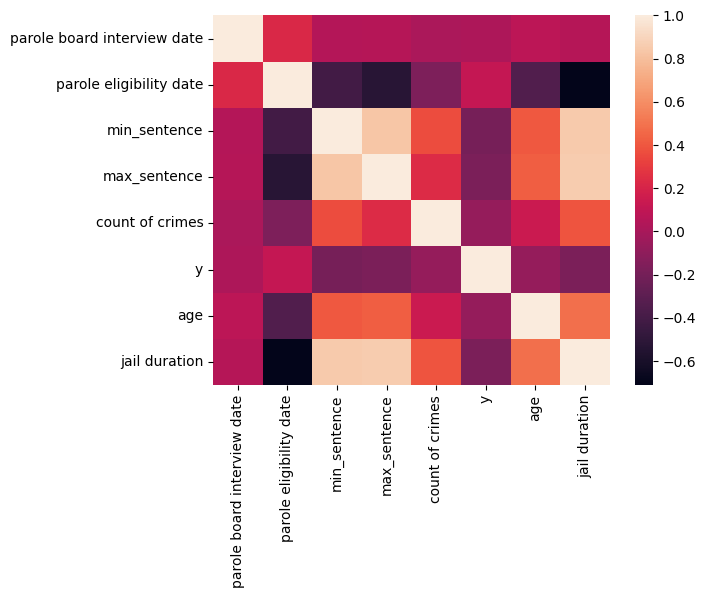

In [28]:
data.drop(columns=['release date','birth date', 'year of entry'],inplace=True)

numerical_df = data.select_dtypes(include=[np.number])
sns.heatmap(numerical_df.corr())

In [33]:
# Split the dataset

# Use LazyClassifier if your target variable 'y' is for classification
# If 'y' is continuous, use LazyRegressor instead
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the result of all models
print(models)

100%|██████████| 29/29 [01:19<00:00,  2.74s/it]

[LightGBM] [Info] Number of positive: 4928, number of negative: 19197
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 261
[LightGBM] [Info] Number of data points in the train set: 24125, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.204269 -> initscore=-1.359821
[LightGBM] [Info] Start training from score -1.359821
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis      0.46               0.58     0.58      0.50   
NearestCentroid                    0.43               0.58     0.58      0.45   
Perceptron                         0.48               0.58     0.58      0.52   
GaussianNB                         0.40 

Model Accuracy: 0.8086870026525199


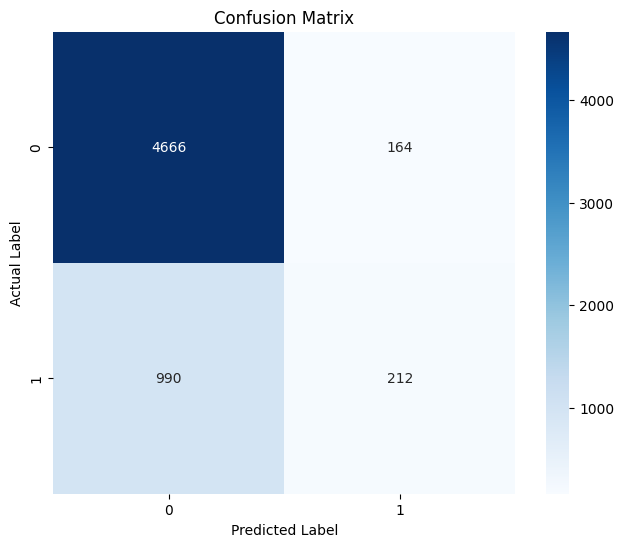

In [40]:
# Instantiate an XGBoost model
# For classification use XGBClassifier, for regression use XGBRegressor
model = xgb.XGBClassifier(random_state=42)  

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
# For classification tasks:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Show the plot
plt.show()

Decision Tree Model Accuracy: 0.7178381962864722


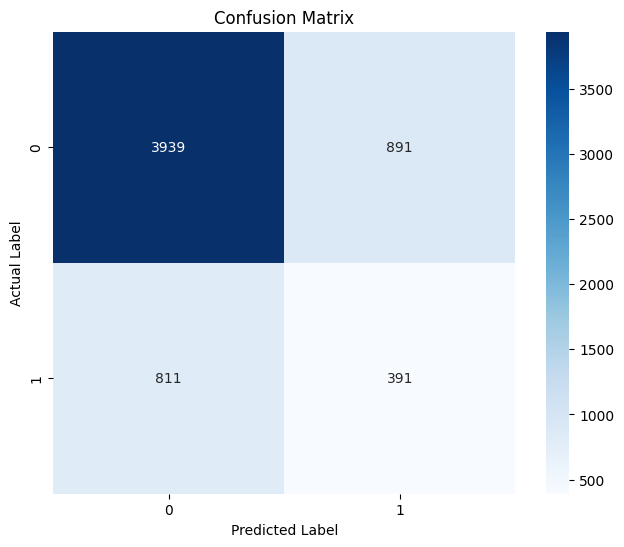

In [41]:
# Assuming X_train, X_test, y_train, and y_test are already defined

# Instantiate the DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Model Accuracy: {accuracy}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Show the plot
plt.show()


GAM Model Accuracy: 0.8028846153846154


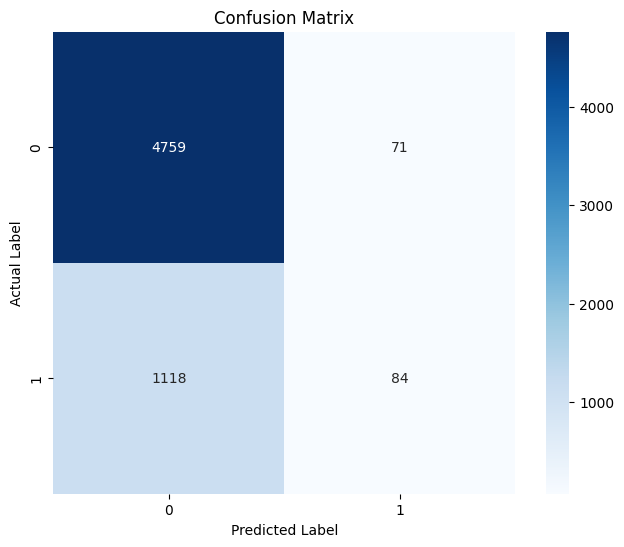

In [43]:
# Instantiate a Logistic GAM model (since it's a classification problem)
gam = LogisticGAM()

# Train the model
gam.fit(X_train, y_train)

# Make predictions
y_pred_encoded = gam.predict(X_test)

# Decode the predictions to original labels if needed
# y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred_encoded)
print(f"GAM Model Accuracy: {accuracy}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_encoded)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Show the plot
plt.show()